## Section1 如何用Alphalens计算IC值？

## 目录
1. Alphalen是什么？
2. 如何编写Alpha因子？
3. Alphalens需要什么数据格式？
4. 如何计算不同Quantiles收益与标准差？
5. 如何将不同收益曲线可视化？
6. 什么是信息系数？

## Alphalen是什么？
Alphalens是一个Python库，专门做股票的alpha(α)绩效分析预测。

下载方式： pip install alphalens

官方网站： http://quantopian.github.io/alphalens/index.html

## 如何编写Alpha因子？
1. 编制函数需要的算法，调用talib计算momentum
2. 定义计算alpha值的类
3. 编制因子的函数，并返回因子DataFrame
4. 传入股票数据（Panel）
5. 输出Factor数据

In [1]:
# encoding:utf-8
import talib as ta
import numpy as np
import pandas as pd

# 1. 编制函数需要的算法，调用talib计算momentum
def momentum(df, period=2):
    return pd.DataFrame(
        {name: ta.ROCR(item.values, period) 
         for name, item in df.iteritems()},
         index=df.index
        )

# 2. 定义计算alpha值的类
class alphas(object):
    def __init__(self, pn_data):
        if pn_data.isnull().values.any():
            pn_data.fillna(method='ffill',inplace=True)
        self.close = pd.DataFrame(pn_data.minor_xs('close'), 
                                  dtype=np.float64)

# 3. 编制因子的函数，并返回因子DataFrame
    def mom001(self):
        alpha = -1 * momentum(self.close)
        return alpha

In [2]:
# 4. 传入股票数据
import pandas as pd
import tushare as ts
from fxdayu_data import DataAPI
from datetime import datetime

In [3]:
pn = DataAPI.candle(u"家电行业", "D", start=datetime(2016, 1, 1), end=datetime(2016, 12, 31))
pn

<class 'pandas.core.panel.Panel'>
Dimensions: 36 (items) x 244 (major_axis) x 5 (minor_axis)
Items axis: 000016.XSHE to 603519.XSHG
Major_axis axis: 2016-01-04 15:00:00 to 2016-12-30 15:00:00
Minor_axis axis: close to volume

In [4]:
#5. 输出Factor数据
alpha_mom = alphas(pn).mom001()
print alpha_mom.tail()

                     000016.XSHE  000100.XSHE  000333.XSHE  000418.XSHE  \
2016-12-26 15:00:00    -0.989201    -0.971751    -0.997533    -0.979958   
2016-12-27 15:00:00    -1.006565    -0.976744    -1.006043    -0.993015   
2016-12-28 15:00:00    -0.997817    -0.956395    -0.991522    -0.989313   
2016-12-29 15:00:00    -0.980435    -0.979167    -0.990106    -0.990520   
2016-12-30 15:00:00    -0.986871    -1.003040    -1.003563    -0.997226   

                     000521.XSHE  000533.XSHE  000541.XSHE  000651.XSHE  \
2016-12-26 15:00:00    -1.015267    -1.051261    -1.006067    -0.998378   
2016-12-27 15:00:00    -1.038760    -1.058726    -1.002024    -1.036530   
2016-12-28 15:00:00    -1.001504    -1.024780    -0.991950    -1.012998   
2016-12-29 15:00:00    -1.001493    -1.001562    -0.994949    -0.994389   
2016-12-30 15:00:00    -1.039039    -1.000000    -0.996971    -0.987169   

                     000921.XSHE  002005.XSHE     ...       600060.XSHG  \
2016-12-26 15:00:00    

## Alphalens需要什么数据格式？

factor: MultiIndex（用stack()方法来转换）

prices: DataFrame

In [5]:
#转换成MultiIndex
factor = alpha_mom.stack()
print factor.tail()

2016-12-30 15:00:00  600854.XSHG   -0.994624
                     600870.XSHG   -0.991399
                     600983.XSHG   -0.988136
                     603366.XSHG   -1.017112
                     603519.XSHG   -0.961575
dtype: float64


In [6]:
# 股票池价格的Dataframe
prices = pn.minor_xs('close')
print prices.tail()

                     000016.XSHE  000100.XSHE  000333.XSHE  000418.XSHE  \
2016-12-26 15:00:00         4.58         3.44        28.31      32.7600   
2016-12-27 15:00:00         4.60         3.36        28.30      32.7000   
2016-12-28 15:00:00         4.57         3.29        28.07      32.4099   
2016-12-29 15:00:00         4.51         3.29        28.02      32.3900   
2016-12-30 15:00:00         4.51         3.30        28.17      32.3200   

                     000521.XSHE  000533.XSHE  000541.XSHE  000651.XSHE  \
2016-12-26 15:00:00         6.65        12.51       9.9500      24.6200   
2016-12-27 15:00:00         6.70        12.80       9.9000      24.9700   
2016-12-28 15:00:00         6.66        12.82       9.8699      24.9400   
2016-12-29 15:00:00         6.71        12.82       9.8500      24.8299   
2016-12-30 15:00:00         6.92        12.82       9.8400      24.6200   

                     000921.XSHE  002005.XSHE     ...       600060.XSHG  \
2016-12-26 15:00:00    

In [7]:
#输入Alphalen所需要的数据格式
import alphalens

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor, prices, quantiles=3)
print factor_data.head()

/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                                        1         5        10    factor  \
date                asset                                                 
2016-01-06 15:00:00 000016.XSHE -0.100494 -0.214185 -0.153213 -0.975884   
                    000100.XSHE -0.076167 -0.078624 -0.115479 -1.048969   
                    000333.XSHE -0.080722 -0.082305 -0.112694 -1.062921   
                    000418.XSHE -0.099965 -0.154555 -0.207728 -1.150959   
                    000521.XSHE -0.097778 -0.140741 -0.120000 -1.027397   

                                 factor_quantile  
date                asset                         
2016-01-06 15:00:00 000016.XSHE                3  
                    000100.XSHE                1  
                    000333.XSHE                1  
                    000418.XSHE                1  
                    000521.XSHE                2  


## 如何不同Quantiles期望收益与标准差？

In [10]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_date=True)
print(mean_return_by_q)
print(std_err_by_q)

                                           1         5         10
factor_quantile date                                             
1               2016-01-06 15:00:00  0.001353 -0.002502 -0.012857
                2016-01-07 15:00:00  0.018425  0.013933 -0.001985
                2016-01-08 15:00:00  0.014663  0.017300 -0.007444
                2016-01-11 15:00:00  0.006493 -0.012574 -0.007468
                2016-01-12 15:00:00  0.005944 -0.009779  0.002225
                2016-01-13 15:00:00  0.000745 -0.032576 -0.004909
                2016-01-14 15:00:00  0.008202 -0.012919 -0.007167
                2016-01-15 15:00:00  0.003872 -0.011308 -0.024745
                2016-01-18 15:00:00 -0.002483 -0.008479 -0.029872
                2016-01-19 15:00:00  0.005215 -0.009938  0.002063
                2016-01-20 15:00:00 -0.005998  0.000162 -0.001812
                2016-01-21 15:00:00 -0.005868  0.004773 -0.009036
                2016-01-22 15:00:00 -0.002575  0.002124 -0.010943
          

## 如何将不同收益曲线可视化？
1. 持有不同天数的收益曲线
2. 累积收益曲线

/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=5).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))
/Users/calvinku/anaconda/envs/fxdayu/lib/python2.7/site-packages/alphalens/plotting.py:767: FutureWarning: pd.rolling_apply is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,min_periods=1,window=10).apply(args=<tuple>,func=<function>,kwargs=<dict>)
  min_periods=1, args=(period,))


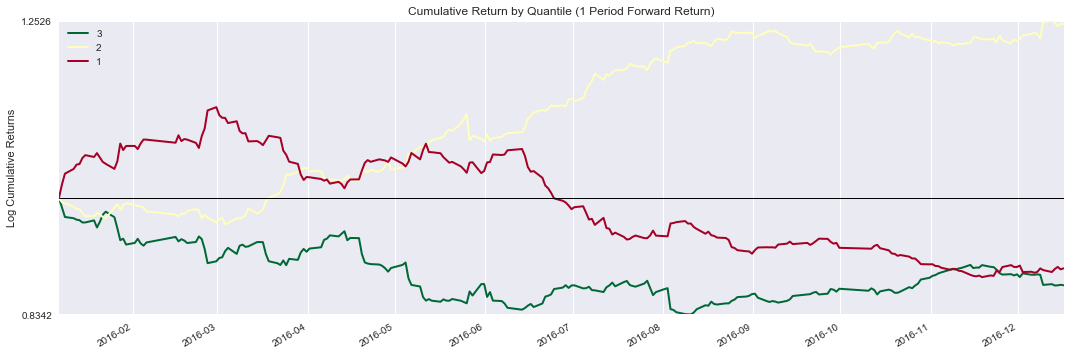

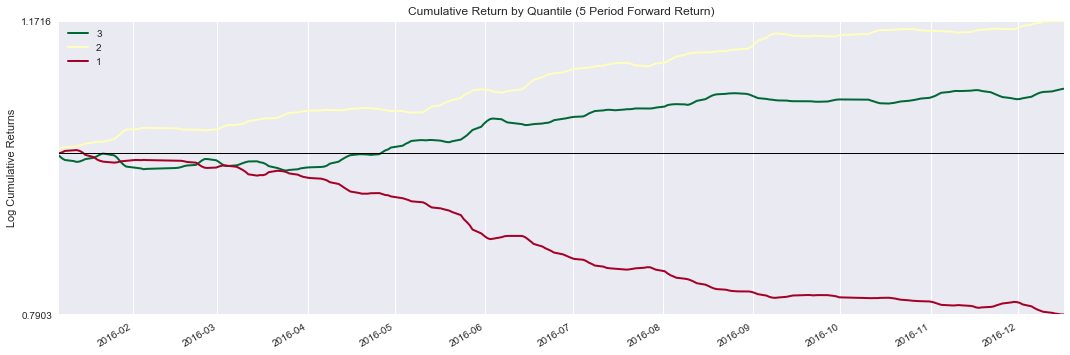

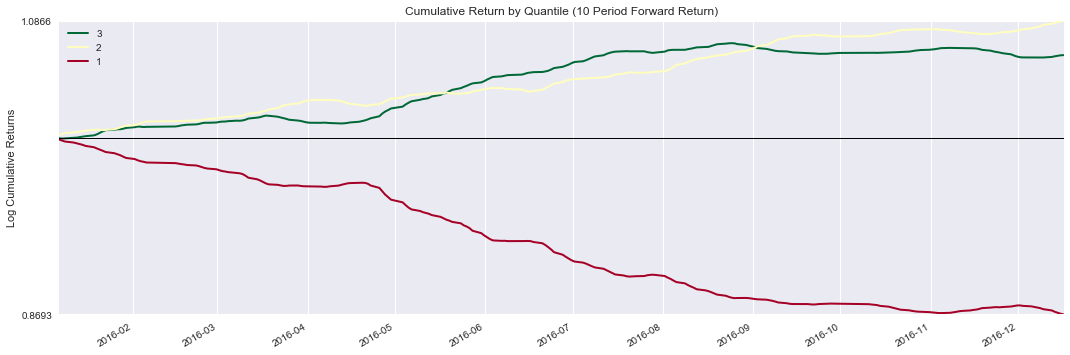

In [9]:
import matplotlib.pyplot as plt

alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 1)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 5)
alphalens.plotting.plot_cumulative_returns_by_quantile(mean_return_by_q, 10)
plt.show()

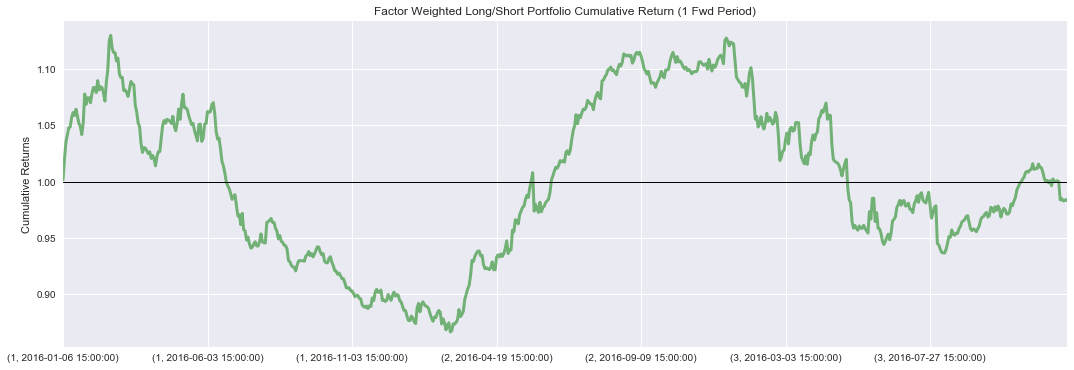

## 什么是信息系数？
度量变量的预测值与实际值之间的关系的相关值。信息系数是用来评估金融分析师预测技能的一种表现方法。

系数在-1到1之间，越大表示正相关程度强。标准是mean(IC)>0.02

### 什么是spearman相关系数？
$P_s = 1- \frac {6\sum d_i^2}{n(n^2-1)}$

其中d为秩次差。

因此IC值是代表因子排序与收益排序的相关性。

### 什么是秩次差？
A = [1,3,5,7,9]
B = [3,2,4,5,1]

A的排序是1,2,3,4,5

B的排序是3,2,4,5,1

d为排序相减

$d^2 = 4,0,1,1,16$

$P_s = 1-\frac{6*22}{5(25-1)} = -0.1$

IC值例子


                           1         5         10
date                                             
2016-01-06 15:00:00 -0.201081 -0.190982  0.001100
2016-01-07 15:00:00 -0.503342 -0.147727 -0.000334
2016-01-08 15:00:00 -0.484119 -0.185495 -0.077540
2016-01-11 15:00:00 -0.099599  0.112634  0.166110
2016-01-12 15:00:00 -0.128676  0.200719  0.027741
2016-01-13 15:00:00 -0.005348  0.365317  0.152330
2016-01-14 15:00:00 -0.159523  0.259455  0.060662
2016-01-15 15:00:00 -0.124217  0.293506  0.236669
2016-01-18 15:00:00 -0.007487  0.084651  0.169137
2016-01-19 15:00:00 -0.383463  0.200917  0.211917
2016-01-20 15:00:00  0.291062  0.231474  0.230863
2016-01-21 15:00:00  0.360733 -0.065546  0.032850
2016-01-22 15:00:00  0.135992 -0.146218  0.008403
2016-01-25 15:00:00 -0.042947  0.011765 -0.089381
2016-01-26 15:00:00 -0.292612 -0.377235 -0.326509
2016-01-27 15:00:00 -0.541523 -0.276089  0.071352
2016-01-28 15:00:00  0.293812  0.305730  0.438350
2016-01-29 15:00:00 -0.206891 -0.023226  0.370999


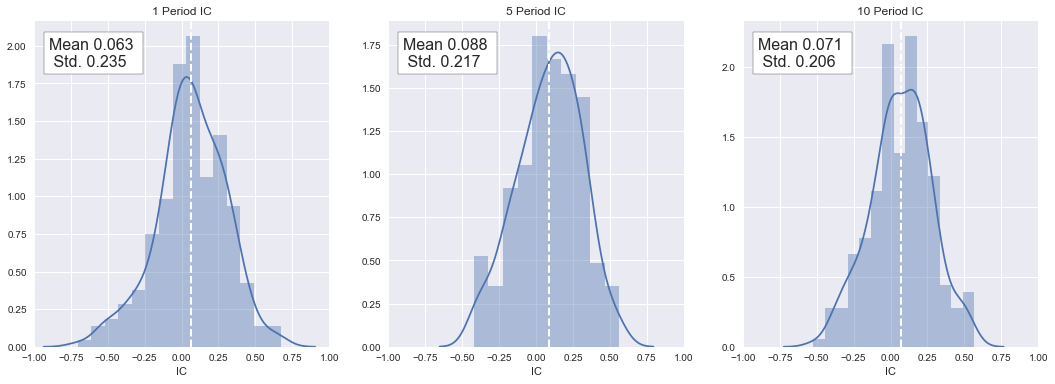

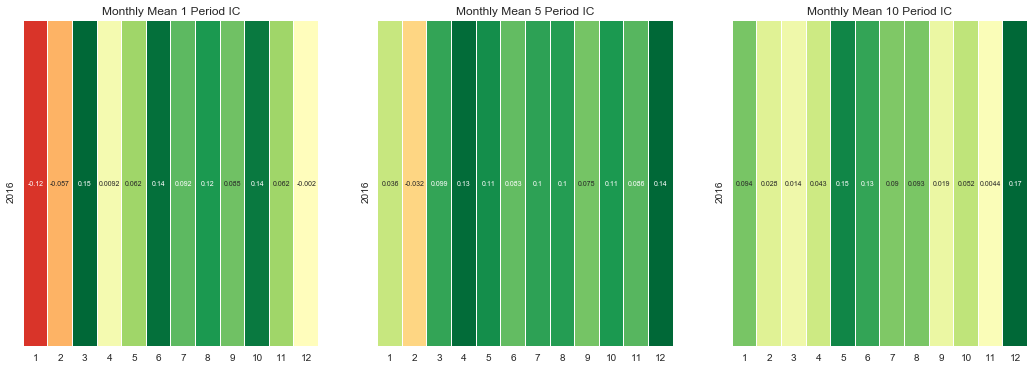

In [10]:
ic = alphalens.performance.factor_information_coefficient(factor_data)
print ic
alphalens.plotting.plot_ic_hist(ic)
mean_monthly_ic = alphalens.performance.mean_information_coefficient(factor_data, by_time='M')
# print mean_monthly_ic.mean()
alphalens.plotting.plot_monthly_ic_heatmap(mean_monthly_ic)
plt.show()

## 作业
试用alphalens不同的功能。